In [3]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8l.yaml")  # build a new model from scratch
model = YOLO("yolo11s.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model("https://ultralytics.com/images/bus.jpg",save=True)  # predict on an image

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18.4M/18.4M [00:02<00:00, 7.72MB/s]



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /workspace/train/bus.jpg: 640x480 4 persons, 1 bus, 68.1ms
Speed: 2.5ms preprocess, 68.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /workspace/runs/detect/predict2


New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=keihin-test-4.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning /workspace/datasets/keihin-test-4/YOLO/labels/train.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]
val: Scanning /workspace/datasets/keihin-test-4/YOLO/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to /workspace/runs/detect/train6/labels.jpg... 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_al

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /workspace/runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         4G      1.064      4.315       1.14         10        640: 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         40         40      0.593      0.778      0.713       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.78G     0.9611      1.817      1.086          9        640: 100%|██████████| 23/23 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         40         40      0.792      0.638      0.837      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.83G     0.9671      1.364      1.105         13        640: 100%|██████████| 23/23 [00:03<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         40         40      0.883      0.535      0.644      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.83G      1.067       1.25      1.177         18        640: 100%|██████████| 23/23 [00:03<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         40         40      0.173      0.545      0.291      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.84G      1.078        1.1      1.174         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         40         40      0.602      0.821      0.774      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.87G      1.039     0.9434      1.165         18        640: 100%|██████████| 23/23 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         40         40      0.628      0.867      0.915      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.89G      1.011     0.8773      1.145         14        640: 100%|██████████| 23/23 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         40         40      0.636      0.553      0.648      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.96G       1.05     0.7967      1.177         12        640: 100%|██████████| 23/23 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         40         40      0.821      0.595      0.674      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.99G     0.9887     0.7759      1.154         16        640: 100%|██████████| 23/23 [00:03<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         40         40      0.821      0.781      0.917       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.04G     0.9913     0.8078      1.175          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         40         40      0.865       0.86      0.938       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.05G      1.012     0.7062      1.158         13        640: 100%|██████████| 23/23 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         40         40      0.968      0.853      0.906      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.11G     0.9873     0.6991      1.142         13        640: 100%|██████████| 23/23 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         40         40      0.939      0.884      0.949      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.11G     0.9721     0.6594      1.144         15        640: 100%|██████████| 23/23 [00:03<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         40         40      0.914      0.961      0.985      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.11G     0.9243     0.6689      1.112         16        640: 100%|██████████| 23/23 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         40         40      0.894      0.905       0.96      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.11G      0.917     0.6452      1.134         10        640: 100%|██████████| 23/23 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         40         40      0.882      0.891      0.943      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.11G     0.9398     0.6695      1.158         12        640: 100%|██████████| 23/23 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         40         40      0.954      0.949      0.982      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.11G     0.8969     0.6374      1.108          7        640: 100%|██████████| 23/23 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         40         40      0.931      0.985      0.989       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.11G     0.8884     0.5783      1.079         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         40         40      0.904      0.822      0.918      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.11G     0.9076     0.6011      1.118          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40         40      0.784      0.831      0.808      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.11G     0.8773     0.5646      1.077         16        640: 100%|██████████| 23/23 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         40         40      0.964      0.935      0.967      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.11G     0.8537     0.5628      1.089         16        640: 100%|██████████| 23/23 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40         40      0.789      0.823      0.934      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.11G     0.8642     0.5361       1.11         13        640: 100%|██████████| 23/23 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         40         40      0.947      0.975      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.11G     0.8604     0.5595      1.054         14        640: 100%|██████████| 23/23 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         40         40      0.987      0.968      0.984      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.11G     0.9418     0.6231      1.145         13        640: 100%|██████████| 23/23 [00:03<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         40         40      0.794      0.824      0.866      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.11G     0.8623      0.604      1.087         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         40         40      0.966       0.89      0.987      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.11G     0.8549     0.5418      1.084         11        640: 100%|██████████| 23/23 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         40         40      0.958      0.977      0.973      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.11G     0.8621     0.5325      1.079         10        640: 100%|██████████| 23/23 [00:03<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         40         40      0.908      0.972      0.955      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.11G      0.857     0.5554      1.068         14        640: 100%|██████████| 23/23 [00:03<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         40         40      0.883          1      0.973      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.11G     0.8466      0.532      1.092         15        640: 100%|██████████| 23/23 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         40         40      0.963      0.982      0.989      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.11G     0.8458      0.522      1.083         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         40         40      0.943      0.972      0.978       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.11G     0.8352     0.4945      1.082         11        640: 100%|██████████| 23/23 [00:03<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         40         40      0.943      0.946      0.979      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.11G     0.8326     0.5153      1.076          8        640: 100%|██████████| 23/23 [00:03<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         40         40      0.978      0.994      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.11G     0.8495     0.5131      1.078         17        640: 100%|██████████| 23/23 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         40         40      0.946      0.992      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.11G      0.824     0.5538      1.046         20        640: 100%|██████████| 23/23 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         40         40      0.979      0.975      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.11G     0.8398     0.4797      1.077         14        640: 100%|██████████| 23/23 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         40         40      0.928      0.952      0.977      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.11G     0.8236     0.5049      1.094         12        640: 100%|██████████| 23/23 [00:03<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         40         40      0.984      0.996      0.995      0.822



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_a


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.11G     0.8161     0.5007      1.048          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         40         40      0.982      0.967       0.97      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.11G     0.7908     0.4816       1.07         11        640: 100%|██████████| 23/23 [00:03<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         40         40      0.973          1      0.989      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.11G     0.8032     0.4847       1.07          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         40         40      0.966      0.959      0.989      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.11G     0.7897     0.4826      1.049          9        640: 100%|██████████| 23/23 [00:03<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         40         40      0.985          1      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.11G     0.7976     0.4832      1.064         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         40         40      0.963          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.11G     0.7896     0.4571      1.055         13        640: 100%|██████████| 23/23 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         40         40      0.969          1      0.993      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.11G     0.7765     0.4585      1.064         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         40         40      0.965      0.977      0.977      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.11G      0.801      0.447      1.065         14        640: 100%|██████████| 23/23 [00:03<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         40         40      0.968      0.977      0.975       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.11G     0.7835     0.4706      1.053         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         40         40      0.959      0.975      0.973       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.11G     0.7724      0.439      1.031         12        640: 100%|██████████| 23/23 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         40         40       0.96          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.11G     0.7645     0.4464      1.056         19        640: 100%|██████████| 23/23 [00:03<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         40         40      0.966          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.11G     0.7483     0.4686      1.021         16        640: 100%|██████████| 23/23 [00:03<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         40         40      0.984      0.982      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.11G     0.7409     0.4147      1.026          9        640: 100%|██████████| 23/23 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         40         40      0.981      0.985      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.11G     0.7372     0.4237      1.029         15        640: 100%|██████████| 23/23 [00:03<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         40         40      0.972          1      0.991      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.11G     0.7401     0.4487      1.021         18        640: 100%|██████████| 23/23 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         40         40      0.931      0.964      0.968      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.11G      0.745      0.449      1.027         17        640: 100%|██████████| 23/23 [00:03<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         40         40      0.967      0.977      0.972      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.11G      0.732     0.4377      1.027         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         40         40      0.984          1      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.11G     0.7419     0.4242      1.015         14        640: 100%|██████████| 23/23 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         40         40      0.961          1      0.992       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.11G     0.7061      0.405     0.9927         15        640: 100%|██████████| 23/23 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         40         40      0.991          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.11G     0.7053     0.3949      1.015         15        640: 100%|██████████| 23/23 [00:03<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         40         40      0.971      0.982      0.991      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.11G     0.7095     0.3986      1.012         13        640: 100%|██████████| 23/23 [00:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         40         40      0.986          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.11G     0.7337     0.4137      1.027         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         40         40      0.988          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.11G     0.7244     0.4217      1.011         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         40         40      0.961      0.977      0.978      0.817



Exception ignored in:   File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_a


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.11G     0.7353     0.4211      1.015         11        640: 100%|██████████| 23/23 [00:03<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         40         40      0.994          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.11G     0.7232     0.3958     0.9997         14        640: 100%|██████████| 23/23 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         40         40       0.97      0.951      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.11G     0.6871     0.3891     0.9883         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         40         40      0.985      0.997      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.11G     0.7066     0.3972      1.013         16        640: 100%|██████████| 23/23 [00:03<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         40         40      0.974          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.11G     0.6983     0.4108      1.015         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         40         40      0.995      0.993      0.995      0.844



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f83f40d0160>
Traceback (most recent call last):
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/workspace/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_a


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.11G     0.7126     0.4376      1.012         20        640: 100%|██████████| 23/23 [00:03<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         40         40      0.992          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.11G      0.704     0.4013      1.008          7        640: 100%|██████████| 23/23 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         40         40      0.987          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.11G     0.6978     0.3902      1.001         13        640: 100%|██████████| 23/23 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         40         40      0.972      0.977      0.977      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.11G     0.7106     0.3901      1.013         12        640: 100%|██████████| 23/23 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         40         40      0.966      0.977      0.974       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.11G     0.6674     0.3716     0.9831          9        640: 100%|██████████| 23/23 [00:03<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         40         40      0.978          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.11G     0.6687     0.3745     0.9861         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         40         40      0.986          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.11G     0.6536     0.3575     0.9871         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         40         40      0.987          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.11G     0.6589     0.3562     0.9734         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         40         40      0.968      0.977      0.975       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.11G     0.6577      0.366     0.9891         15        640: 100%|██████████| 23/23 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         40         40      0.981      0.991      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.12G     0.7213     0.3952      1.023         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         40         40      0.966      0.951      0.977      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.12G     0.6584     0.3581      1.013         13        640: 100%|██████████| 23/23 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40         40      0.991          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.12G     0.6263     0.3497     0.9826         17        640: 100%|██████████| 23/23 [00:03<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         40         40      0.989          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.12G     0.6305     0.3558     0.9767         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         40         40      0.966      0.977      0.976      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.12G     0.6538     0.3481     0.9782          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         40         40      0.988          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.12G     0.6249     0.3362     0.9789         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         40         40      0.989          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.12G     0.6163     0.3448     0.9657         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         40         40      0.993          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.12G       0.64     0.3547     0.9857         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         40         40      0.994          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.12G     0.6336     0.3536     0.9813         19        640: 100%|██████████| 23/23 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         40         40      0.994          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.12G     0.6459     0.3493     0.9999          9        640: 100%|██████████| 23/23 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         40         40      0.994          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.12G     0.6271     0.3433     0.9529         17        640: 100%|██████████| 23/23 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         40         40      0.971      0.977      0.978      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.12G     0.6031     0.3345     0.9536         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         40         40      0.993          1      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.12G     0.6222     0.3454      0.964         14        640: 100%|██████████| 23/23 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         40         40      0.993          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.12G     0.5888     0.3272     0.9557         14        640: 100%|██████████| 23/23 [00:03<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         40         40      0.985          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.12G     0.6147      0.344     0.9788         11        640: 100%|██████████| 23/23 [00:03<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         40         40      0.984          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.12G     0.5966     0.3215     0.9663         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         40         40      0.992          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.12G     0.5686     0.3201     0.9409         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         40         40      0.993          1      0.995      0.831


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.12G     0.5053     0.2848     0.8791          8        640: 100%|██████████| 23/23 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         40         40      0.991          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.12G     0.4924     0.2631     0.8894          7        640: 100%|██████████| 23/23 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         40         40      0.992          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.12G     0.5122     0.2688     0.9201          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         40         40      0.992          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.12G      0.489     0.2691      0.888          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         40         40      0.992          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.12G     0.4744     0.2628     0.8958          7        640: 100%|██████████| 23/23 [00:03<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         40         40      0.986      0.977      0.979      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.12G     0.4901     0.2669     0.8919          7        640: 100%|██████████| 23/23 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         40         40      0.981      0.977      0.979      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.12G     0.4772     0.2568      0.887          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         40         40      0.991          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.12G     0.4614     0.2527       0.89          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         40         40      0.991          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.12G     0.4719     0.2498     0.8985          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         40         40      0.972      0.977       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.12G     0.4842     0.2551     0.8999          7        640: 100%|██████████| 23/23 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         40         40      0.972      0.977       0.98      0.845



100 epochs completed in 0.123 hours.
Optimizer stripped from /workspace/runs/detect/train6/weights/last.pt, 19.2MB
Optimizer stripped from /workspace/runs/detect/train6/weights/best.pt, 19.2MB

Validating /workspace/runs/detect/train6/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         40         40      0.993          1      0.995      0.843
               dogclip          9          9      0.997          1      0.995      0.875
              leafairy         11         11      0.995          1      0.995      0.863
              bluefish         11         11      0.989          1      0.995      0.823
             whitefish          9          9      0.992          1      0.995      0.813
Speed: 0.1ms preprocess, 16.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /workspace/runs/detect/train6
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /workspace/datasets/keihin-test-4/YOLO/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


                   all         40         40      0.993          1      0.995      0.846
               dogclip          9          9      0.997          1      0.995      0.875
              leafairy         11         11      0.995          1      0.995      0.872
              bluefish         11         11      0.989          1      0.995      0.823
             whitefish          9          9      0.992          1      0.995      0.813
Speed: 2.1ms preprocess, 16.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /workspace/runs/detect/train62

image 1/1 /workspace/train/1.jpg: 640x640 1 dogclip, 1 leafairy, 2 bluefishs, 1 whitefish, 135.0ms
Speed: 3.1ms preprocess, 135.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


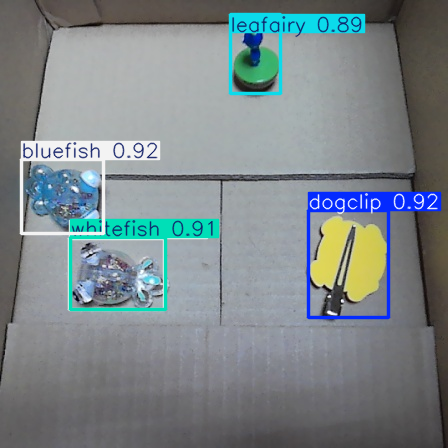

Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CPU (AMD Ryzen 5 5600 6-Core Processor)

PyTorch: starting from '/workspace/runs/detect/train6/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (18.3 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 1.7s, saved as '/workspace/runs/detect/train6/weights/best.onnx' (36.2 MB)

Export complete (2.0s)
Results saved to /workspace/runs/detect/train6/weights
Predict:         yolo predict task=detect model=/workspace/runs/detect/train6/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/workspace/runs/detect/train6/weights/best.onnx imgsz=640 data=keihin-test-4.yaml  
Visualize:       https://netron.app


In [4]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11s.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="keihin-test-4.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    batch=16,
    imgsz=640,  # Image size for training
    device=0,  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
    augment=True,
)

# Evaluate the model's performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model("1.jpg")  # Predict on an image
results[0].show()  # Display results

# Export the model to ONNX format for deployment
path = model.export(format="onnx")  # Returns the path to the exported model

In [6]:
from ultralytics import YOLO
# import sys

# print(sys.path)
# net_name = sys.argv[1]
# input_width = int(sys.argv[2])
# input_height = int(sys.argv[3])

# Load a custom model
model = YOLO("../models/train17/weights/best.pt")

results = model("2.jpg")
# path = model.export(format="onnx", imgsz=[input_height, input_width])
path = model.export(format="onnx", imgsz=[224, 320]) # for MaixCam
print(path)


image 1/1 /workspace/train/2.jpg: 640x640 2 dogclips, 1 leafairy, 2 bluefishs, 1 whitefish, 33.9ms
Speed: 2.5ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CPU (AMD Ryzen 5 5600 6-Core Processor)

PyTorch: starting from '../models/train17/weights/best.pt' with input shape (1, 3, 224, 320) BCHW and output shape(s) (1, 8, 1470) (18.3 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 2.1s, saved as '../models/train17/weights/best.onnx' (36.0 MB)

Export complete (2.2s)
Results saved to /workspace/models/train17/weights
Predict:         yolo predict task=detect model=../models/train17/weights/best.onnx imgsz=224,320  
Validate:        yolo val task=detect model=../models/train17/weights/best.onnx imgsz=224,320 data=keihin-test-4.yaml  WARNING ⚠️ non-PyTorch val requires square images, 'imgsz=[224, 320]' will not work. Use export